---
title: "Constant Accelaration"
authro: Yang Peng
institute: California State University, Northridge
format: 
  html:
    toc: true
    code-fold: false
    page-layout: full
    fig-cap-location: bottom
    number-sections: true
    number-depth: 2
jupyter: python3
---

Let's take a look at another motion of a cart on a track.
Let us plot the velocity along $x$ as a function of time $t$.

![Constant accelaration motion.](accelaration.png){#fig-accelaration_plot}.

Clearly this looks like a linear function. Just like we did with a position-time graph before, we can fit a linear function to this data (for the part where it is speeding up). The equation looks like
$$
v = (0.0577 \mathrm{m/s^2})t - 0.0767 \mathrm{m/s}.
$$
Note that the first first term linear in $t$ is the accelaration. We can write the average accelaration as
$$
a_{avg} = \frac{\Delta v}{\Delta t}.
$$
If we plot the position versus time, we have the following graph.
![Constant accelaration motion (position vs time)](accelaration_position_time.png)

# Modeling the Velocity
First, let's try to make a model that gives the same velocity graph as above. Since it's just a linear function, we can use the same method that we used to plot position vs. time for constant velocity (from the last section). 

We can solve the final velocity
$$
a = \frac{v_2 - v_1}{\Delta t},
$$
$$
v_2 = v_1 + a \Delta t.
$$

This means that instead of updating the position using the velocity, I can just update the velocity using the acceleration. Let's code this.

Before we do that, we need some starting values. We want to make this look EXACTLY like the data, so I am going to use the following:

- $x = 1.33 \mathrm{m}$
- $v = 0.0 \mathrm{m/s}$
- $a = 0.0577 \mathrm{m/s^2}$
- $t = 1.4 \mathrm{s}$

Let us create a code very similar to the constant velocity code. 

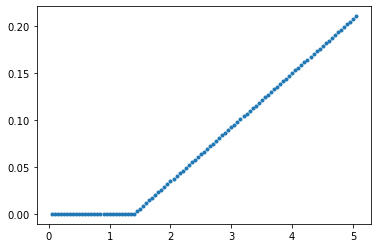

In [1]:
import matplotlib.pyplot as plt
#Staring conditions below
x=1.33
v=0.0
a=0.0577
ts=1.4
dt=0.05
t=0
vlist = []
tlist = []

while t<ts:
  t=t+dt
  tlist.append(t)
  vlist.append(v)

#this is the real loop  
while t<5:
  #calculate the new velocity
  v = v+ a*dt
  t = t+ dt
  tlist.append(t)
  vlist.append(v)

  
plt.plot(tlist,vlist,'.')
plt.show()

# Modeling position
- How can we model the position of the cart as well?
- Can we use the expression for constant velocity when the velocity isn't even constant?
- Let's go back to the definition of the velocity.
- When velocity is changing, we should consider the _average velocity_
$$
v_{avg} = \frac{\Delta x}{\Delta t} = \frac{x_2 - x_1}{\Delta t}.
$$
- On the other hand, when the velocity is changing at a constant rate, the average velocity can also be written as
$$
v_{avg} = \frac{v_1 + v_2}{2}.
$$
- We can write the position update formula
$$
x_2 = x_1 + v_{avg}\Delta t = x_1 + \left(\frac{v_1 + v_2}{2}\right)\Delta t.
$$
- We can remove the final velocity $v_2$ which leads to 
$$
x_2 = x_1 + \left(\frac{v_1 + v_1 + a\Delta t}{2}\right)\Delta t = x_1 + v_1 \Delta t + \frac{1}{2}a\left(\Delta t \right)^2.
$$

1.6071763749999988


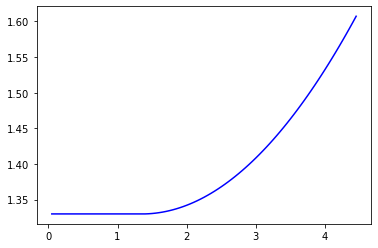

In [5]:
#Staring conditions below
x=1.33
v=0.0
a=0.0577
ts=1.4
dt=0.05
t=0
tlist = []
vlist = []
xlist = []
#this next line makes a graph (don't worry)

#this is a loop to waste time
while t<ts:
  t=t+dt
  tlist.append(t)
  vlist.append(v)
  xlist.append(x)
  
#this is the real loop  
while t<4.4:
  #calculate the new velocity
  t = t + dt
  v= v + a * dt 
  x = x + v*dt + 0.5*a*dt**2
#   x = x + v*dt + 0.5*a*dt**2
  tlist.append(t)
  vlist.append(v)
  xlist.append(x)
plt.plot(tlist, xlist, '-b') 
print(x)

# Catching Up to Another Car
You are a police officer in a stationary car. Another car drives past you traveling at a constant speed of 40 m/s. It takes you 3 seconds to put your car into drive and then you accelerate to catch the speeder. Your car has a constant acceleration of 6 $\mathrm{m/s^2}$ with a maximum speed of 60 m/s. How long before you catch the car and how far are you from your starting position?

This isn't the simplest problem because it has multiple parts. Here's what we need to do:

- Model the motion of the speeding car. This is will be pretty easy since it's moving at a constant speed.
- Wait 3 seconds for the police car to start moving
- Model the motion of the police car accelerating
- Check to see if the police car reaches its maximum speed, if so make the acceleration zero
- Check to see if the two cars have the same position.



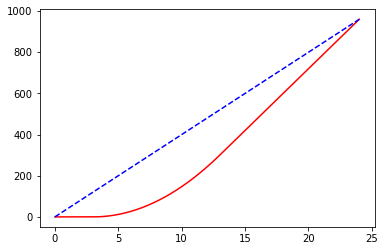

time to catch =  24.00499999999951  seconds
position of police car =  960.2999999999453  m
position of speeder =  960.2000000000813  m


In [12]:
#now for initial conditions
#both cars start at x = 0
xp=0
xs=0
xplist = []
xslist = []
tlist = []
vs=40
#this is the max speed of police
vpmax=60
vp=0
#acceleration of police.
#ap is the starting value
ap=0
#apa is the value when acceleratinge
apa=6
t=0
dt=0.005
#this is the time to wait for the start of police
twait=3
#instead of doing a loop for a certain amount of time
#we make a loop that goes until the police catches
#the speeder

while xp<=xs:
  #update the position of the speeder
  xs = xs + vs*dt 
  #set a to zero
  ap=0

  #if it's after 3 sec and before they meet, set a to 6
  if (t>twait) and (vp<vpmax):
    ap=apa
    
  vp += ap*dt
  xp += vp*dt + 0.5*ap*dt**2
  t += dt 
  xplist.append(xp)
  xslist.append(xs)
  tlist.append(t)
plt.plot(tlist,xplist,'-r',label='police')
plt.plot(tlist,xslist,'--b',label='speeder')
plt.show()
#after the loop ends, print time and position
print("time to catch = ", t," seconds")
print("position of police car = ",xp," m")
print("position of speeder = ",xs," m")

# Homework
1. A car starts from rest and reaches a speed of 30 m/s in 1.3 seconds. What is the average acceleration of the car?

1. A rocket has an acceleration of 10.6 $\mathrm{m/s^2}$ and is traveling with a velocity of 41 m/s. How fast will the rocket be traveling after 3.2 seconds?

1. A rocket is traveling horizontal with an initial speed of 72 m/s at which point it opens a parachute to slow down. This gives the rocket an acceleration of -12.2 m/s^2^. How long will it take to stop? How far will it travel before it stops?

1. You are designing a stunt in which a car crashes into a hay barrier (to safely stop it). In order to protect the driver, the car needs to have an acceleration no greater than -20 $\mathrm{m/s^2}$. How thick should your hay barrier be? (Assuming constant accelaration when the car is moving in the hay barrier.) Write a python program to plot the position vs time, and velocity vs time diagrams.

2. Two cars are moving toward each other. Car A starts from rest and has an acceleration of 8 $\mathrm{m/s^2}$. Car B starts 2000 meters ahead of car A and it is already moving with a speed of 30 m/s (in the opposite direction) with an acceleration of 4 $\mathrm{m/s^2}$. When and where do the two cars meet? Write a python program to plot position vs time diagram. 